In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_selection import SelectKBest
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate

ModuleNotFoundError: No module named 'sklearn'

In [96]:
df_CASP = pd.read_csv ("CASP.csv")
id_names = ['Seq Name']
features1 = ['mcg','gvh','alm','mit','erl','pox','vac','nuc']
class_names = ['class']

columns_names = id_names + features1 + class_names

df_YEAST = pd.read_csv("yeast.data",names=columns_names,sep='\s+')


CONSIGO METRICAS DE LOS ATRIBUTOS 

In [5]:
def GetMetricas(df_):

    media = df_.mean()
    mediana = df_.median()
    desvio = df_.std()
    atributos = list(media.index)
    dicc = {'Atributos': atributos}
    metricas = pd.DataFrame(dicc)
    metricas["Media"] = np.array(media)
    metricas["Mediana"] = np.array(mediana)
    metricas["Desvio"] = np.array(desvio)
    
    return metricas

In [13]:
metricas_CASP = GetMetricas(df_CASP)
metricas_yeast = GetMetricas(df_YEAST)
print(metricas_yeast)



  Atributos     Media  Mediana    Desvio
0       mcg  0.500121     0.49  0.137299
1       gvh  0.499933     0.49  0.123924
2       alm  0.500034     0.51  0.086670
3       mit  0.261186     0.22  0.137098
4       erl  0.504717     0.50  0.048351
5       pox  0.007500     0.00  0.075683
6       vac  0.499885     0.51  0.057797
7       nuc  0.276199     0.22  0.106491


In [16]:
df_YEAST.describe()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.500121,0.499933,0.500034,0.261186,0.504717,0.007500,0.499885,0.276199
std,0.137299,0.123924,0.086670,0.137098,0.048351,0.075683,0.057797,0.106491
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


In [18]:
#BALANCE DE CLASES
b_clases_yeast = df_YEAST['class'].value_counts()
print(b_clases_yeast)

CYT    463
NUC    429
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: class, dtype: int64


In [10]:
#FRECUENCIA RELATIVA
frec = b_clases_yeast / len(df_YEAST)
print(frec)

CYT    0.311995
NUC    0.289084
MIT    0.164420
ME3    0.109838
ME2    0.034367
ME1    0.029650
EXC    0.023585
VAC    0.020216
POX    0.013477
ERL    0.003369
Name: class, dtype: float64


PLOTEO HISTOGRAMAS Y GRAFICOS PARA EXPLORACIÓN DE DATOS

In [ ]:
clases = set(df_YEAST["class"])

for clase in clases:
   
    df_clase = df_YEAST.loc[df_YEAST["class"] == clase]
    df_clase = df_clase.drop(["class","Seq Name"], axis =1)
    atributos = df_clase.columns.values
    print(clase)
    #plt.figure(figsize =(000.5,000.5))
    #_ = plt.hist(np.array(df_clase[atributo]), density = True, color = 'r')
    df_clase.hist()
    plt.show()
  
   


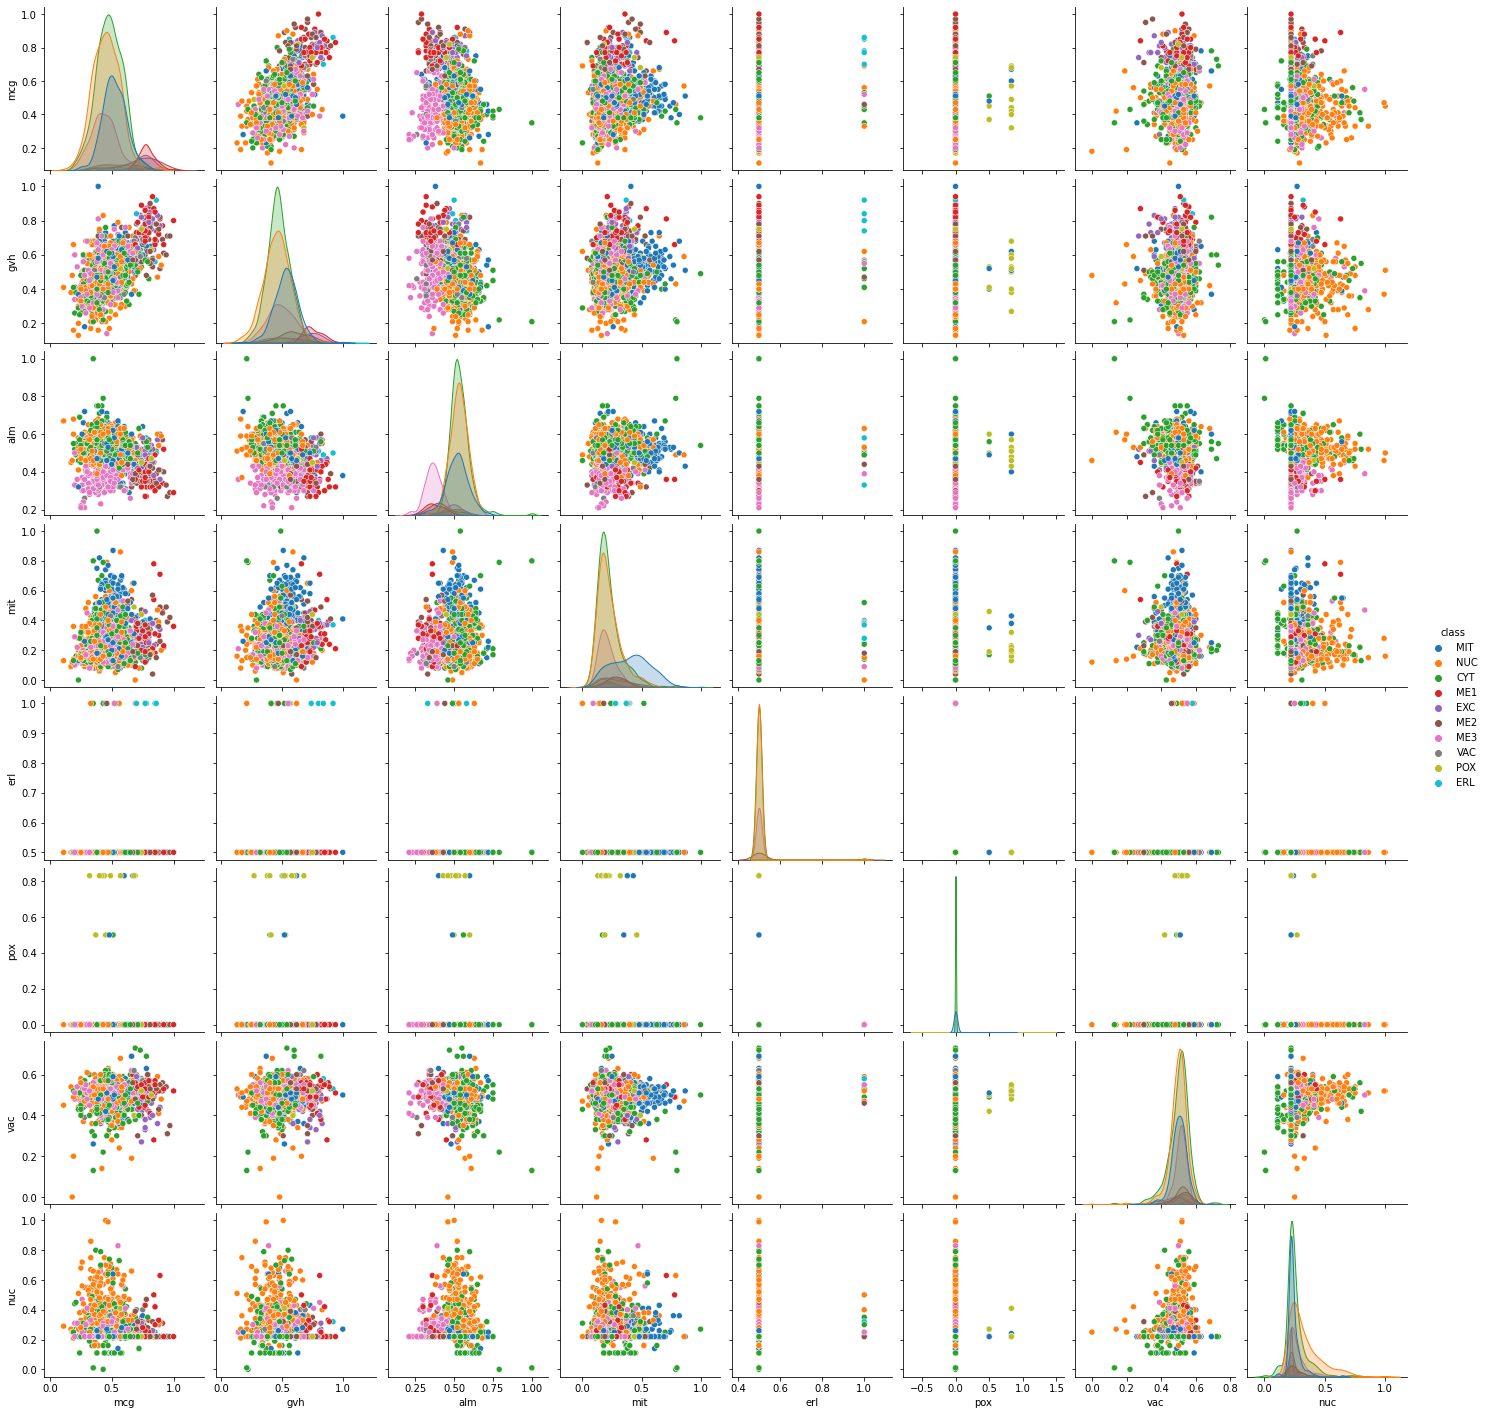

In [11]:
sns.pairplot(df_YEAST, hue = 'class')

In [ ]:
_ = plt.hist(np.array(ddf_YEAST.loc[df_YEAST["class"] == clase]['bSQI']), range = [0,100], bins = 100, density = True, color = 'r')
_ = plt.hist(np.array(df.loc[df['Ritmo'] != '~']['bSQI']), range = [0,100], bins = 100, density = True, color = 'b', alpha = 0.5)
plt.title('Histograma de bSQI')
plt.show()

CLASIF MULTICLASE

SACO LAS CLASES BINARIAS Y PREPARO DATOS PARA CLASIFICAR

In [97]:
df_YEAST = df_YEAST.drop(['erl', 'pox'], axis=1)
features1.remove("erl")
features1.remove("pox")

ELIJO LAS 4 CLASES MAS NUMEROSAS: CIT, NUC, MIT, ME3. DECIDO ESTO PORQUE NUCLEAN EL 85% DE LAS CLASES.

In [125]:
df_YEAST_mult = df_YEAST[df_YEAST['class'].isin(["NUC","CYT","MIT","ME3"])]

df_atributos = df_YEAST_mult.drop(["class","Seq Name"], axis=1)
df_clases = df_YEAST_mult.drop(features1, axis=1)
df_clases = df_clases.drop("Seq Name", axis=1)

atributos = list(df_atributos.keys())

enc = LabelEncoder()
df_clases = enc.fit_transform(df_clases)
clases = np.unique(df_clases)


c:\Users\pedro\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [100]:
clf_LDA = LinearDiscriminantAnalysis()
clf_QDA = QuadraticDiscriminantAnalysis()
mejores_atributos =[]
puntuaciones_LDA = []
puntuaciones_QDA = []
numero = np.arange(1,6)

for i in range(len([atributos])):
    aux = SelectKBest(k=i+1).fit_transform(df_atributos, df_clases)
    
    mejores_atributos.append(aux)
    df_atributos_mejor = pd.DataFrame(aux, columns = numero[:i+1])

    kf = KFold(n_splits=5)
    for train, test in kf.split(df_atributos_mejor):
        training = df_atributos_mejor.iloc[train]
        testting = df_atributos_mejor.iloc[test]

CLASIF BINARIA: ELIJO CYT Y NUC. LAS 2 MAS PRESENTES

In [131]:
df_YEAST_bin = df_YEAST[df_YEAST['class'].isin(["NUC","CYT"])]
df_atributos_bin = df_YEAST_bin.drop(["class","Seq Name"], axis=1)
df_clases_bin = df_YEAST_bin.drop(features1, axis=1)
df_clases_bin = df_clases_bin.drop("Seq Name", axis=1)

atributos = list(df_atributos.keys())

enc = LabelEncoder()
df_clases_bin = enc.fit_transform(df_clases_bin)
clases_bin = np.unique(df_clases)

print(df_atributos_bin)


       mcg   gvh   alm   mit   vac   nuc
3     0.58  0.44  0.57  0.13  0.54  0.22
5     0.51  0.40  0.56  0.17  0.49  0.22
7     0.48  0.45  0.59  0.20  0.58  0.34
9     0.40  0.39  0.60  0.15  0.58  0.30
10    0.43  0.39  0.54  0.21  0.53  0.27
...    ...   ...   ...   ...   ...   ...
1477  0.38  0.32  0.64  0.41  0.44  0.11
1478  0.38  0.40  0.66  0.35  0.43  0.11
1480  0.47  0.43  0.61  0.40  0.48  0.47
1482  0.43  0.40  0.60  0.16  0.53  0.39
1483  0.65  0.54  0.54  0.13  0.53  0.22

[892 rows x 6 columns]


In [140]:
clf_LDA = LinearDiscriminantAnalysis()
clf_QDA = QuadraticDiscriminantAnalysis()
mejores_atributos =[]
puntuaciones_LDA = []
puntuaciones_QDA = []
numero = np.arange(1,7)
for i in range(len(features1)):

    aux = SelectKBest(k=i+1).fit_transform(df_atributos_bin, df_clases_bin)
    mejores_atributos.append(aux)

    df_atributos_mejor = pd.DataFrame(aux, columns = numero[:i+1])
   
    val_cruz_LDA_F1 = (cross_val_score(clf_LDA, df_atributos_mejor, df_clases_bin, scoring="f1", cv=5)).mean()
    val_cruz_QDA_F1 = (cross_val_score(clf_QDA, df_atributos_mejor, df_clases_bin, scoring="f1", cv=5)).mean()

    puntuaciones_LDA.append(val_cruz_LDA_F1)
    puntuaciones_QDA.append(val_cruz_QDA_F1)


print(puntuaciones_LDA)
print(puntuaciones_QDA)
    

    

[0.5324075490874247, 0.5529307950916229, 0.5542685265507308, 0.5511891370020867, 0.5325206364193706, 0.5435093510399567]
[0.44663760499280747, 0.4657734633464302, 0.5004065477277829, 0.5065187304036225, 0.5006344357974651, 0.504735680203551]
